In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [126]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\Lenovo\\MachineLearningModels\\weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,No
1,7/3/2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4,No


In [3]:
df.shape

(36881, 24)

In [4]:
col_names = df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [5]:
df.drop(['RISK_MM'],axis = 1, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36543 non-null  float64
 3   MaxTemp        36639 non-null  float64
 4   Rainfall       36255 non-null  float64
 5   Evaporation    24035 non-null  float64
 6   Sunshine       23317 non-null  float64
 7   WindGustDir    33513 non-null  object 
 8   WindGustSpeed  33520 non-null  float64
 9   WindDir9am     34072 non-null  object 
 10  WindDir3pm     35919 non-null  object 
 11  WindSpeed9am   36219 non-null  float64
 12  WindSpeed3pm   36235 non-null  float64
 13  Humidity9am    36311 non-null  float64
 14  Humidity3pm    36370 non-null  float64
 15  Pressure9am    33309 non-null  float64
 16  Pressure3pm    33329 non-null  float64
 17  Cloud9am       24381 non-null  float64
 18  Cloud3

In [7]:
# find categorical variables
categorical = [var for var in df.columns if df.dtypes[var]=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print("The categorical variables are :", categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [8]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,5/18/2009,Hobart,NW,WSW,SSE,No,No
1,7/3/2009,Launceston,SSW,E,SW,No,No
2,2/18/2010,Williamtown,SSE,SSE,SSE,No,No
3,3/4/2010,PerthAirport,SW,SSE,SW,No,No
4,9/9/2010,GoldCoast,NNW,WNW,N,No,No


In [9]:
df['Location'].value_counts()

Canberra            1085
Sydney               971
Melbourne            904
Perth                899
Hobart               893
Brisbane             887
Adelaide             887
Darwin               881
Ballarat             813
Bendigo              811
Cairns               805
Albany               802
SydneyAirport        801
NorahHead            796
Launceston           795
Albury               795
Williamtown          794
Moree                793
MountGambier         793
AliceSprings         792
MountGinini          789
BadgerysCreek        788
Newcastle            782
Tuggeranong          782
GoldCoast            777
Townsville           777
MelbourneAirport     774
Richmond             769
Mildura              769
Walpole              768
Woomera              766
CoffsHarbour         765
Witchcliffe          765
PearceRAAF           763
Cobar                763
Portland             763
SalmonGums           759
Dartmoor             757
NorfolkIsland        756
Nuriootpa            756


In [10]:
# check missing value in categorical variables
df[categorical].isnull().sum()

Date               0
Location           0
WindGustDir     3368
WindDir9am      2809
WindDir3pm       962
RainToday        626
RainTomorrow     620
dtype: int64

In [11]:
# print categorical variables containing missing values
cat1 = [var for var in categorical if df[var].isnull().sum() != 0]

print(df[cat1].isnull().sum())

WindGustDir     3368
WindDir9am      2809
WindDir3pm       962
RainToday        626
RainTomorrow     620
dtype: int64


In [12]:
# view frequency of categorical variables
for var in categorical:
    print(df[var].value_counts())

3/3/2009      42
5/24/2009     40
7/11/2011     40
7/9/2010      40
10/28/2011    40
              ..
11/17/2007     1
11/1/2007      1
11/26/2007     1
11/3/2007      1
6/6/2008       1
Name: Date, Length: 1473, dtype: int64
Canberra            1085
Sydney               971
Melbourne            904
Perth                899
Hobart               893
Brisbane             887
Adelaide             887
Darwin               881
Ballarat             813
Bendigo              811
Cairns               805
Albany               802
SydneyAirport        801
NorahHead            796
Launceston           795
Albury               795
Williamtown          794
Moree                793
MountGambier         793
AliceSprings         792
MountGinini          789
BadgerysCreek        788
Newcastle            782
Tuggeranong          782
GoldCoast            777
Townsville           777
MelbourneAirport     774
Richmond             769
Mildura              769
Walpole              768
Woomera              766

In [13]:
# view frequency distribution of categorical variables
for var in categorical :
    print(df[var].value_counts()/np.float(len(df)))

3/3/2009      0.001139
5/24/2009     0.001085
7/11/2011     0.001085
7/9/2010      0.001085
10/28/2011    0.001085
                ...   
11/17/2007    0.000027
11/1/2007     0.000027
11/26/2007    0.000027
11/3/2007     0.000027
6/6/2008      0.000027
Name: Date, Length: 1473, dtype: float64
Canberra            0.029419
Sydney              0.026328
Melbourne           0.024511
Perth               0.024376
Hobart              0.024213
Brisbane            0.024050
Adelaide            0.024050
Darwin              0.023888
Ballarat            0.022044
Bendigo             0.021990
Cairns              0.021827
Albany              0.021746
SydneyAirport       0.021719
NorahHead           0.021583
Launceston          0.021556
Albury              0.021556
Williamtown         0.021529
Moree               0.021502
MountGambier        0.021502
AliceSprings        0.021474
MountGinini         0.021393
BadgerysCreek       0.021366
Newcastle           0.021203
Tuggeranong         0.021203
GoldCoast 

In [14]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels ')

Date  contains  1473  labels 
Location  contains  46  labels 
WindGustDir  contains  17  labels 
WindDir9am  contains  17  labels 
WindDir3pm  contains  17  labels 
RainToday  contains  3  labels 
RainTomorrow  contains  3  labels 


In [15]:
df['Date'].dtypes

dtype('O')

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2009
1    2009
2    2010
3    2010
4    2010
Name: Year, dtype: int64

In [17]:
df['Month'] = df['Date'].dt.month
df['Month'].head()

0    5
1    7
2    2
3    3
4    9
Name: Month, dtype: int64

In [18]:
df['Day'] = df['Date'].dt.day
df['Day'].head()

0    18
1     3
2    18
3     4
4     9
Name: Day, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           36881 non-null  datetime64[ns]
 1   Location       36881 non-null  object        
 2   MinTemp        36543 non-null  float64       
 3   MaxTemp        36639 non-null  float64       
 4   Rainfall       36255 non-null  float64       
 5   Evaporation    24035 non-null  float64       
 6   Sunshine       23317 non-null  float64       
 7   WindGustDir    33513 non-null  object        
 8   WindGustSpeed  33520 non-null  float64       
 9   WindDir9am     34072 non-null  object        
 10  WindDir3pm     35919 non-null  object        
 11  WindSpeed9am   36219 non-null  float64       
 12  WindSpeed3pm   36235 non-null  float64       
 13  Humidity9am    36311 non-null  float64       
 14  Humidity3pm    36370 non-null  float64       
 15  Pressure9am    3330

In [20]:
df.drop('Date',axis = 1, inplace = True)

In [21]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,SSE,...,1022.2,1.0,1.0,9.1,13.3,No,No,2009,5,18
1,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,SW,...,1002.4,NaN,NaN,1.3,13.7,No,No,2009,7,3
2,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,SSE,...,1021.9,6.0,4.0,22.7,24.4,No,No,2010,2,18
3,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,SW,...,1014.9,6.0,1.0,20.0,26.1,No,No,2010,3,4
4,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,N,...,1015.0,NaN,NaN,22.2,22.6,No,No,2010,9,9


In [22]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
print('There are {} categorical valriables\n'.format(len(categorical)))
print('The Categorical variables are :', categorical)

There are 6 categorical valriables

The Categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [23]:
df[categorical].isnull().sum()

Location           0
WindGustDir     3368
WindDir9am      2809
WindDir3pm       962
RainToday        626
RainTomorrow     620
dtype: int64

In [24]:
print('Location contains', len(df.Location.unique()),'labels')

Location contains 46 labels


In [25]:
df.Location.unique()

array(['Hobart', 'Launceston', 'Williamtown', 'PerthAirport', 'GoldCoast',
       'Mildura', 'Nuriootpa', 'NorahHead', 'Townsville', 'MountGambier',
       'MelbourneAirport', 'SydneyAirport', 'Darwin', 'Newcastle',
       'Watsonia', 'Walpole', 'CoffsHarbour', 'MountGinini', 'Sale',
       'PearceRAAF', 'Adelaide', 'Albury', 'Richmond', 'Cairns',
       'BadgerysCreek', 'AliceSprings', 'Bendigo', 'SalmonGums',
       'Canberra', 'Ballarat', 'Witchcliffe', 'Woomera', 'Penrith',
       'WaggaWagga', 'Dartmoor', 'Perth', 'Cobar', 'Sydney', 'Melbourne',
       'NorfolkIsland', 'Tuggeranong', 'Albany', 'Moree', 'Wollongong',
       'Portland', 'Brisbane'], dtype=object)

In [26]:
df.Location.value_counts()

Canberra            1085
Sydney               971
Melbourne            904
Perth                899
Hobart               893
Brisbane             887
Adelaide             887
Darwin               881
Ballarat             813
Bendigo              811
Cairns               805
Albany               802
SydneyAirport        801
NorahHead            796
Launceston           795
Albury               795
Williamtown          794
Moree                793
MountGambier         793
AliceSprings         792
MountGinini          789
BadgerysCreek        788
Newcastle            782
Tuggeranong          782
GoldCoast            777
Townsville           777
MelbourneAirport     774
Richmond             769
Mildura              769
Walpole              768
Woomera              766
CoffsHarbour         765
Witchcliffe          765
PearceRAAF           763
Cobar                763
Portland             763
SalmonGums           759
Dartmoor             757
NorfolkIsland        756
Nuriootpa            756


In [27]:
# one hot encoding for Location variable
pd.get_dummies(df.Location, drop_first = True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,SydneyAirport,Townsville,Tuggeranong,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [29]:
df['WindGustDir'].unique()

array(['NW', 'SSW', 'SSE', 'SW', 'NNW', 'N', 'SE', 'E', 'S', 'WSW', 'W',
       nan, 'NE', 'NNE', 'WNW', 'ESE', 'ENE'], dtype=object)

In [30]:
df.WindGustDir.value_counts()

SE     2403
W      2375
SSE    2330
N      2328
S      2317
SW     2272
E      2209
WSW    2206
SSW    2139
WNW    2052
ENE    2026
NW     1940
ESE    1894
NE     1769
NNE    1663
NNW    1590
Name: WindGustDir, dtype: int64

In [31]:
pd.get_dummies(df.WindGustDir,drop_first=True,dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [33]:
df['WindDir9am'].unique()

array(['WSW', 'E', 'SSE', 'WNW', 'ENE', 'ESE', 'NW', nan, 'NE', 'SE',
       'NNW', 'N', 'W', 'NNE', 'S', 'SW', 'SSW'], dtype=object)

In [34]:
df['WindDir9am'].value_counts()

N      2862
SE     2421
E      2375
SSE    2301
S      2233
W      2218
ENE    2090
SW     2085
NW     2077
NNE    2059
NNW    2017
NE     1941
SSW    1895
ESE    1864
WNW    1860
WSW    1774
Name: WindDir9am, dtype: int64

In [35]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na = True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na = True).sum(axis = 0)

ENE    2090
ESE    1864
N      2862
NE     1941
NNE    2059
NNW    2017
NW     2077
S      2233
SE     2421
SSE    2301
SSW    1895
SW     2085
W      2218
WNW    1860
WSW    1774
NaN    2809
dtype: int64

In [37]:
print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [38]:
df['WindDir3pm'].unique()

array(['SSE', 'SW', 'N', 'NNE', 'S', 'E', 'W', 'SE', 'NW', nan, 'ESE',
       'NE', 'ENE', 'WSW', 'WNW', 'SSW', 'NNW'], dtype=object)

In [39]:
df['WindDir3pm'].value_counts()

SE     2939
S      2547
W      2486
WSW    2410
SSE    2381
SW     2377
N      2278
E      2252
WNW    2208
NW     2178
ESE    2163
NE     2136
ENE    2063
SSW    1994
NNW    1860
NNE    1647
Name: WindDir3pm, dtype: int64

In [40]:
pd.get_dummies(df.WindDir3pm, drop_first=True,dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
pd.get_dummies(df.WindDir3pm,drop_first=True,dummy_na=True).sum(axis=0)

ENE    2063
ESE    2163
N      2278
NE     2136
NNE    1647
NNW    1860
NW     2178
S      2547
SE     2939
SSE    2381
SSW    1994
SW     2377
W      2486
WNW    2208
WSW    2410
NaN     962
dtype: int64

In [42]:
print('RainToday contains',len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [43]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [44]:
df['RainToday'].value_counts()

No     27756
Yes     8499
Name: RainToday, dtype: int64

In [45]:
pd.get_dummies(df.RainToday,drop_first=True,dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [46]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    8499
NaN     626
dtype: int64

In [47]:
numerical = [var for var in df.columns if df[var].dtype != 'O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :',numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [48]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,2009,5,18
1,1.1,14.5,0.4,NaN,NaN,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,2009,7,3
2,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,2010,2,18
3,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,2010,3,4
4,14.6,25.3,0.0,NaN,NaN,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,2010,9,9


In [49]:
df[numerical].isnull().sum()

MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustSpeed     3361
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
Year                 0
Month                0
Day                  0
dtype: int64

In [50]:
print(round(df[numerical].describe()),2)

       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  36543.0  36639.0   36255.0      24035.0   23317.0        33520.0   
mean      12.0     23.0       3.0          5.0       8.0           40.0   
std        6.0      7.0       9.0          4.0       4.0           14.0   
min       -8.0     -3.0       0.0          0.0       0.0            7.0   
25%        8.0     18.0       0.0          3.0       5.0           31.0   
50%       12.0     22.0       0.0          5.0       8.0           39.0   
75%       17.0     28.0       1.0          7.0      11.0           48.0   
max       30.0     48.0     371.0         81.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count       36219.0       36235.0      36311.0      36370.0      33309.0   
mean           14.0          19.0         69.0         52.0       1017.0   
std             9.0           9.0         18.0         20.0          7.0   
min             0.0 

Text(0, 0.5, 'WindSpeed3pm')

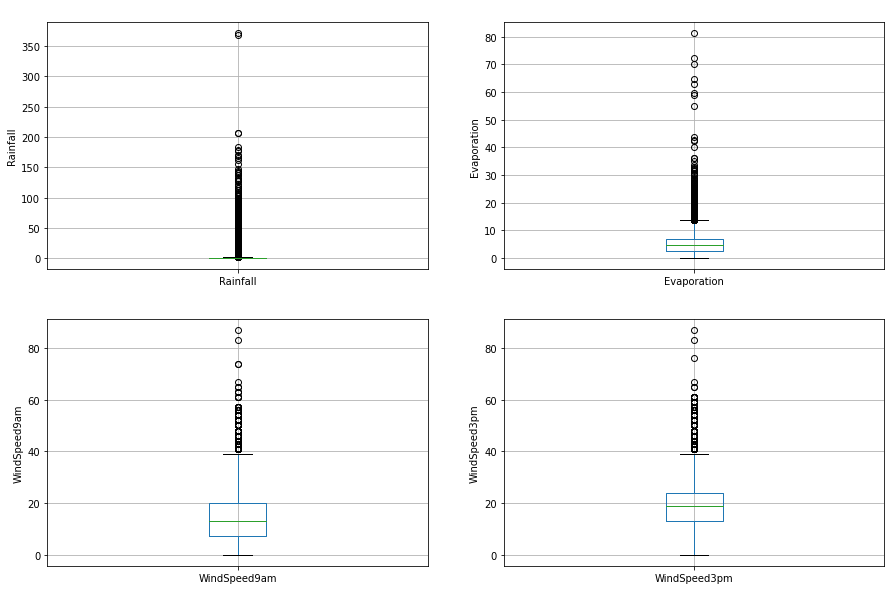

In [51]:
# draw boxplots
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column='Rainfall')
fig.set_title(' ')
fig.set_ylabel('Rainfall')

plt.subplot(2,2,2)
fig = df.boxplot(column = 'Evaporation')
fig.set_title(' ')
fig.set_ylabel('Evaporation')

plt.subplot(2,2,3)
fig = df.boxplot(column = 'WindSpeed9am')
fig.set_title(' ')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2,2,4)
fig = df.boxplot(column = 'WindSpeed3pm')
fig.set_title(' ')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

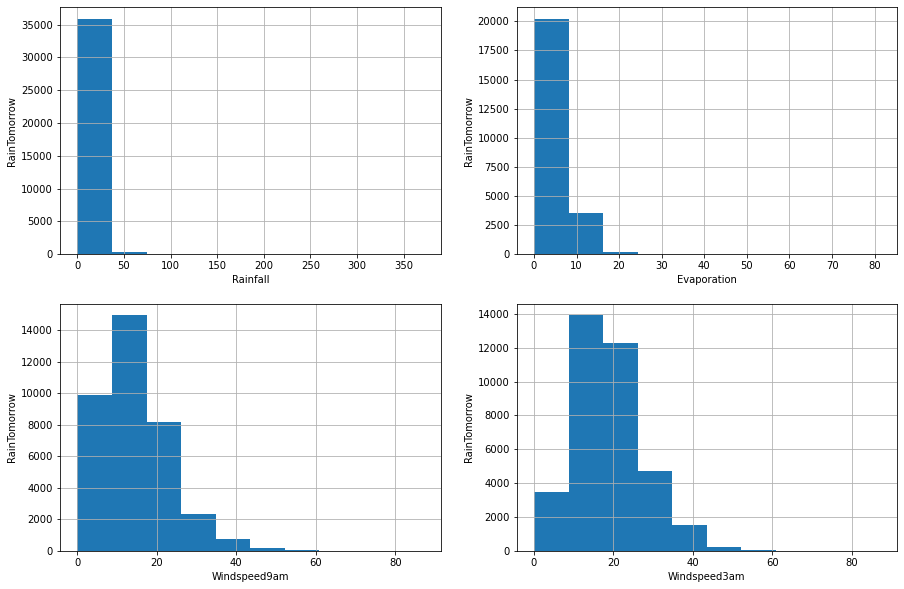

In [52]:
# plot histogram to check distribution
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2,2,2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2,2,3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('Windspeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2,2,4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('Windspeed3am')
fig.set_ylabel('RainTomorrow')

In [53]:
#find outliers for Rainfall variable
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25)-(IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75)+(IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or  > {upperboundary}'.format(lowerboundary=Lower_fence,
                                                                                   upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or  > 3.2


In [54]:
#find outliers for Evaporation variable
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) - (IQR * 3)
print('Evaoporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary = Lower_fence,
                                                                                       upperboundary = Upper_fence))

Evaoporation outliers are values < -10.600000000000001 or > -6.200000000000001


In [55]:
#find outliers for Windspeed9am variable
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary = Lower_fence,
                                                                                       upperboundary = Upper_fence))

WindSpeed9am outliers are values < -32.0 or > 59.0


In [56]:
#find outliers for Windspeed3pm variable
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary = Lower_fence,
                                                                                       upperboundary = Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


In [57]:
X = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

In [58]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [59]:
X_train.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
17784,Newcastle,17.7,25.0,0.0,NaN,NaN,NaN,NaN,NaN,SE,...,NaN,NaN,6.0,6.0,20.5,24.0,No,2010,3,15
29428,Melbourne,19.1,24.0,0.0,2.2,1.0,SW,30.0,W,SW,...,1002.4,1001.5,8.0,8.0,19.8,20.8,No,2011,3,22
33597,Albury,3.9,13.8,1.2,NaN,NaN,ENE,15.0,SE,ESE,...,1025.6,1021.7,NaN,NaN,9.3,13.3,Yes,2011,8,15


In [60]:
# check the shape of X_Train and X_test
X_train.shape, X_test.shape

((29504, 24), (7377, 24))

In [61]:
# check the data types in X_train
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [62]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [63]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [64]:
#check missing values in numerical variables in X_train
X_train[numerical].isnull().sum()

MinTemp            269
MaxTemp            190
Rainfall           500
Evaporation      10284
Sunshine         10879
WindGustSpeed     2676
WindSpeed9am       524
WindSpeed3pm       524
Humidity9am        442
Humidity3pm        401
Pressure9am       2867
Pressure3pm       2862
Cloud9am         10026
Cloud3pm         10408
Temp9am            379
Temp3pm            350
Year                 0
Month                0
Day                  0
dtype: int64

In [65]:
X_test[numerical].isnull().sum()

MinTemp            69
MaxTemp            52
Rainfall          126
Evaporation      2562
Sunshine         2685
WindGustSpeed     685
WindSpeed9am      138
WindSpeed3pm      122
Humidity9am       128
Humidity3pm       110
Pressure9am       705
Pressure3pm       690
Cloud9am         2474
Cloud3pm         2574
Temp9am           108
Temp3pm            94
Year                0
Month               0
Day                 0
dtype: int64

In [66]:
# print percentage of missing values in the numerical variables in training dataset
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col,round(X_train[col].isnull().mean(),4))

MinTemp 0.0091
MaxTemp 0.0064
Rainfall 0.0169
Evaporation 0.3486
Sunshine 0.3687
WindGustSpeed 0.0907
WindSpeed9am 0.0178
WindSpeed3pm 0.0178
Humidity9am 0.015
Humidity3pm 0.0136
Pressure9am 0.0972
Pressure3pm 0.097
Cloud9am 0.3398
Cloud3pm 0.3528
Temp9am 0.0128
Temp3pm 0.0119


In [67]:
# impute missing values in X_train and X_test with respective column median in X_train
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [68]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [69]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [70]:
#print percetage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.090869
WindDir9am     0.075515
WindDir3pm     0.026573
RainToday      0.016947
dtype: float64

In [71]:
# print percentage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.090869
WindDir9am     0.075515
WindDir3pm     0.026573
RainToday      0.016947
dtype: float64

In [72]:
#print categorical variables with missing data
for col in categorical:
    if X_train[col].isnull().mean() > 0 :
        print(col,(X_train[col].isnull().mean()))

WindGustDir 0.09086903470715835
WindDir9am 0.07551518438177875
WindDir3pm 0.026572668112798264
RainToday 0.016946854663774404


In [73]:
# impute missing categorical variables with most frequent value
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0],inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0],inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0],inplace=True)

In [74]:
X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [75]:
# check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [76]:
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [77]:
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [78]:
def max_value(df3,variable,top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

<ipython-input-78-3336412a01b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
<ipython-input-78-3336412a01b6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
<ipython-input-78-3336412a01b6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [79]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [80]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [81]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [82]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [83]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,12.225129,22.941062,0.702867,4.957775,7.810548,40.272912,14.180789,18.870119,69.164351,52.363036,1017.299509,1014.971935,4.556399,4.655335,16.910331,21.471461,2009.938754,6.572905,15.699736
std,6.357184,6.957840,1.203053,2.841566,3.073407,12.926813,8.874938,8.682666,18.154728,20.212957,6.824816,6.723991,2.339185,2.160023,6.387487,6.777013,0.945742,3.557342,8.814768
min,-8.500000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.900000,-5.100000,2007.000000,1.000000,1.000000
25%,7.700000,17.800000,0.000000,3.600000,7.000000,31.000000,7.000000,13.000000,58.000000,38.000000,1013.000000,1010.700000,3.000000,3.000000,12.300000,16.500000,2009.000000,3.000000,8.000000
50%,12.100000,22.400000,0.000000,4.600000,8.300000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.400000,1015.000000,5.000000,5.000000,16.600000,20.900000,2010.000000,7.000000,16.000000
75%,17.000000,27.900000,0.800000,5.600000,9.400000,46.000000,19.000000,24.000000,83.000000,66.000000,1021.700000,1019.200000,6.000000,6.000000,21.500000,26.100000,2011.000000,10.000000,23.000000
max,30.500000,48.100000,3.200000,21.800000,14.300000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.700000,46.100000,2012.000000,12.000000,31.000000


In [84]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [85]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
17784,Newcastle,W,N,SE,No
29428,Melbourne,SW,W,SW,No
33597,Albury,ENE,SE,ESE,Yes
25145,AliceSprings,SE,E,ESE,No
8107,Albury,SE,SE,S,No


In [86]:
X_train.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
17784,Newcastle,17.7,25.0,0.0,4.6,8.3,W,39.0,N,SE,...,1017.4,1015.0,6.0,6.0,20.5,24.0,No,2010,3,15
29428,Melbourne,19.1,24.0,0.0,2.2,1.0,SW,30.0,W,SW,...,1002.4,1001.5,8.0,8.0,19.8,20.8,No,2011,3,22
33597,Albury,3.9,13.8,1.2,4.6,8.3,ENE,15.0,SE,ESE,...,1025.6,1021.7,5.0,5.0,9.3,13.3,Yes,2011,8,15


In [87]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['RainToday'])
#encoder = ce.BinaryEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [88]:
X_train.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
17784,Newcastle,17.7,25.0,0.0,4.6,8.3,W,39.0,N,SE,...,1015.0,6.0,6.0,20.5,24.0,0,1,2010,3,15
29428,Melbourne,19.1,24.0,0.0,2.2,1.0,SW,30.0,W,SW,...,1001.5,8.0,8.0,19.8,20.8,0,1,2011,3,22
33597,Albury,3.9,13.8,1.2,4.6,8.3,ENE,15.0,SE,ESE,...,1021.7,5.0,5.0,9.3,13.3,1,0,2011,8,15


In [89]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                    pd.get_dummies(X_train.Location),
                    pd.get_dummies(X_train.WindGustDir),
                    pd.get_dummies(X_train.WindDir9am),
                    pd.get_dummies(X_train.WindDir3pm)],
                   axis = 1)

In [90]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
17784,17.7,25.0,0.0,4.6,8.3,39.0,0.0,4.0,81.0,65.0,...,0,0,0,1,0,0,0,0,0,0
29428,19.1,24.0,0.0,2.2,1.0,30.0,7.0,15.0,86.0,79.0,...,0,0,0,0,0,0,1,0,0,0
33597,3.9,13.8,1.2,4.6,8.3,15.0,6.0,7.0,86.0,73.0,...,0,0,0,0,0,0,0,0,0,0
25145,17.6,33.8,0.2,15.2,10.1,50.0,31.0,24.0,16.0,10.0,...,0,0,0,0,0,0,0,0,0,0
8107,4.6,19.0,0.0,4.6,8.3,22.0,17.0,9.0,55.0,36.0,...,0,0,1,0,0,0,0,0,0,0


In [91]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                    pd.get_dummies(X_test.Location),
                    pd.get_dummies(X_test.WindGustDir),
                    pd.get_dummies(X_test.WindDir9am),
                    pd.get_dummies(X_test.WindDir3pm)],
                   axis = 1)

In [92]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
33425,5.9,14.3,3.2,4.6,8.3,15.0,7.0,4.0,97.0,96.0,...,0,0,0,0,0,0,0,0,0,0
4685,23.5,28.2,3.2,4.6,0.0,33.0,13.0,13.0,91.0,84.0,...,0,0,0,0,0,0,0,0,0,0
21878,12.7,31.8,0.0,4.6,8.3,35.0,6.0,13.0,87.0,45.0,...,0,0,0,0,0,0,0,0,0,0
24568,2.4,12.4,0.0,4.6,8.3,39.0,13.0,19.0,93.0,53.0,...,0,0,0,1,0,0,0,0,0,0
34894,19.5,31.1,3.2,2.8,5.2,37.0,7.0,17.0,74.0,56.0,...,0,0,0,0,0,0,0,0,1,0


In [93]:
#Feature Scaling
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,...,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,12.225129,22.941062,0.702867,4.957775,7.810548,40.272912,14.180789,18.870119,69.164351,52.363036,...,0.050569,0.059653,0.068838,0.106257,0.063788,0.052230,0.064398,0.067584,0.060161,0.064737
std,6.357184,6.957840,1.203053,2.841566,3.073407,12.926813,8.874938,8.682666,18.154728,20.212957,...,0.219120,0.236847,0.253183,0.308171,0.244379,0.222495,0.245465,0.251035,0.237790,0.246065
min,-8.500000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,17.800000,0.000000,3.600000,7.000000,31.000000,7.000000,13.000000,58.000000,38.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.100000,22.400000,0.000000,4.600000,8.300000,39.000000,13.000000,19.000000,70.000000,53.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,27.900000,0.800000,5.600000,9.400000,46.000000,19.000000,24.000000,83.000000,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.500000,48.100000,3.200000,21.800000,14.300000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
cols = X_train.columns

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
X_train = pd.DataFrame(X_train, columns = [cols])
X_test = pd.DataFrame(X_test, columns = [cols])

In [97]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,...,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.531414,0.508614,0.219646,0.227421,0.546192,0.259945,0.257833,0.331055,0.685351,0.518819,...,0.050569,0.059653,0.068838,0.106257,0.063788,0.052230,0.064398,0.067584,0.060161,0.064737
std,0.163005,0.135895,0.375954,0.130347,0.214924,0.100991,0.161363,0.152327,0.185252,0.204171,...,0.219120,0.236847,0.253183,0.308171,0.244379,0.222495,0.245465,0.251035,0.237790,0.246065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.415385,0.408203,0.000000,0.165138,0.489510,0.187500,0.127273,0.228070,0.571429,0.373737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.528205,0.498047,0.000000,0.211009,0.580420,0.250000,0.236364,0.333333,0.693878,0.525253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.653846,0.605469,0.250000,0.256881,0.657343,0.304688,0.345455,0.421053,0.826531,0.656566,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
X_train.isnull().values.any()

False

In [112]:
y_train.isnull().values.any()

True

In [121]:
pd.isnull(X_train).sum().values.any()

False

In [127]:
# Model training
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ValueError: Input contains NaN